In [1]:
from pyrootmemo.models import Waldron
from pyrootmemo.materials import MultipleRoots, Interface, Soil
from pyrootmemo.geometry import SoilProfile, FailureSurface
from pyrootmemo.helpers import units, Parameter

In [2]:
# generate some root data
roots = MultipleRoots(
    species = "test_species",
    diameter = Parameter([1, 2, 1, 3, 4, 5, 6,], 'mm'),
    tensile_strength = Parameter([40, 30, 40, 20, 10, 5, 20], 'MPa'),
    elastic_modulus = Parameter([100, 100, 100, 100, 100, 100, 100], 'MPa'),
    length = Parameter([1, 1, 1, 1, 1, 1, 1], 'm'),
    #azimuth_angle = Parameter([0, 0, 0, 0, 0, 0, 0], 'degrees'),
    #elevation_angle = Parameter([-40, -30, -20, -10, 0, 10, 20], 'degrees')
)
# roots = MultipleRoots(
#     species = "test_species",
#     diameter = Parameter([1], 'mm'),
#     tensile_strength = Parameter([40], 'MPa'),
#     elastic_modulus = Parameter([100], 'MPa'),
#     length = Parameter([1], 'm'),
#     #azimuth_angle = Parameter([0, 0, 0, 0, 0, 0, 0, 0], 'degrees'),
#     #elevation_angle = Parameter([-40, -30, -20, -10, 0, 10, 20, 30], 'degrees')
# )
# soil--root interface
interface = Interface(
    shear_strength = Parameter(50, "kPa")
)
# generate some soil data
soil = Soil(
    "Sand",
    cohesion = Parameter(2, "kPa"),
    friction_angle = Parameter(30, "degrees")
)
# soil profile object
soil_profile = SoilProfile([soil], depth = Parameter([100], 'm'))
# failure surface object
failure_surface = FailureSurface(
    cross_sectional_area = Parameter(1.0, "m^2"),
    shear_zone_thickness = Parameter(10, "mm"),
    depth = Parameter(1.0, "m")
)

In [3]:
# Create Waldron object
waldron = Waldron(roots, interface, soil_profile, failure_surface)

In [4]:
import numpy as np
u = np.array([1, 2]) * units('mm')
# u = 2 * units('mm')
# c = waldron.calc_reinforcement(u, jacobian = True, total = True)
c = waldron.calc_reinforcement(u, jacobian = False, total = True)
# c = waldron.calc_reinforcement(u, jacobian = True, total = False)
# c = waldron.calc_reinforcement(u, jacobian = False, total = False)
print(c['behaviour_fraction'].shape)
print(c['behaviour_fraction'][0, 2, ...])
print(np.sum(c['behaviour_fraction'][1, ...]))
# F = waldron.pullout.calc_force(0.1 * units('mm'), jacobian = True)
# print(F)

(2, 8)
0.0
1.0


In [5]:
roots.xsection.shape == (1, )

False

{'displacement': <Quantity(69.2217503, 'millimeter')>, 'reinforcement': <Quantity(0.7208512545723529, 'kilopascal')>}


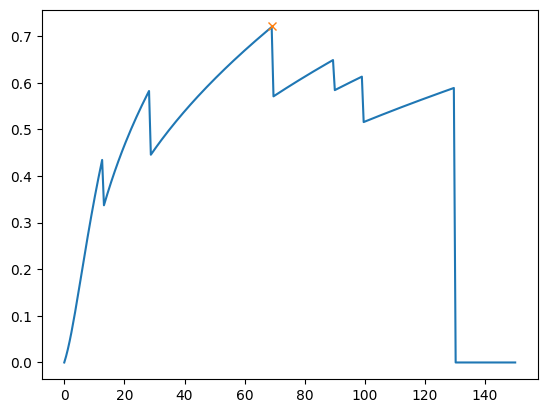

In [6]:
peak = waldron.calc_peak_reinforcement()
print(peak)

import matplotlib.pyplot as plt
shear_displacement = np.linspace(0.0, 150, 251) * units('mm')
reinforcement = [waldron.calc_reinforcement(us)['reinforcement'].to('kPa').magnitude for us in shear_displacement]
plt.plot(shear_displacement.magnitude, reinforcement)
plt.plot(peak['displacement'].to('mm').magnitude, peak['reinforcement'].to('kPa').magnitude, 'x')

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Shear displacement [mm]', ylabel='Reinforcement [kPa]'>)

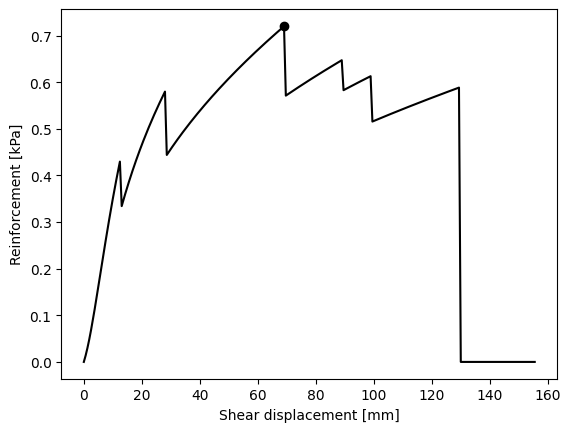

In [7]:
waldron.plot()